 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
%matplotlib inline

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt




# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
### Reading whale returns
aaplD = Path("./Resources/aapl_historical.csv")
costD = Path("./Resources/cost_historical.csv")
googD = Path("./Resources/goog_historical.csv")


whale_return_data = Path("./Resources/whale_returns.csv")

aapl_df = pd.read_csv(aaplD)
cost_df = pd.read_csv(costD)
goog_df = pd.read_csv(googD)


whale_df  = pd.read_csv(whale_return_data)
whale_df


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [3]:
## Count nulls
#print(aapl_df.isnull().sum()),print("-----------------------"),print(cost_df.isnull().sum()),print("-----------------------"),print(goog_df.isnull().sum()),print("-----------------------"),print(sp500_df.isnull().sum()),print("-----------------------"),print(algo_df.isnull().sum()),print("-----------------------"),print(whale_df.isnull().sum())
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
aapl_df.dropna(inplace=True)
cost_df.dropna(inplace=True)
goog_df.dropna(inplace=True)
whale_df.dropna(inplace=True)

whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True),inplace=True), whale_df.drop(columns=['Date'], inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_return_data = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_return_data)
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [6]:
# Count nulls
algo_df.isnull().sum()


Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True),inplace=True), algo_df.drop(columns=['Date'], inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500D = Path("./Resources/sp500_history.csv")
sp500_df  = pd.read_csv(sp500D)
sp500_df


,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [9]:
# Check Data Types
sp500_df.dtypes

sp500_df

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [10]:
# Fix Data Types

sp500_df['Date'] = pd.to_datetime(sp500_df["Date"], dayfirst = True, infer_datetime_format=True)
sp500_df.set_index(sp500_df['Date'], inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df['Close'] = sp500_df['Close'].replace({'\$': ''}, regex=True).astype(float)
sp500_df = sp500_df.sort_values("Date", ascending=True)



#sp500_df.set_index(pd.to_datetime(sp500_df['Date'],dayfirst=True, infer_datetime_format=True),inplace=True), sp500_df.drop(columns=['Date'], inplace=True)


print(sp500_df.dtypes)
sp500_df

Close    float64
dtype: object


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns

daily_return_sp500_df = sp500_df.pct_change()
daily_return_sp500_df.isnull().sum()
daily_return_sp500_df = daily_return_sp500_df.sort_index()
print(daily_return_sp500_df.head())

'''daily_return_sp500_df = sp500_df.pct_change()
daily_return_sp500_df = daily_return_sp500_df.sort_index()
daily_return_sp500_df.head()'''

               Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322


'daily_return_sp500_df = sp500_df.pct_change()\ndaily_return_sp500_df = daily_return_sp500_df.sort_index()\ndaily_return_sp500_df.head()'

In [12]:
# Drop nulls
daily_return_sp500_df.isnull()
daily_return_sp500_df.dropna(inplace=True)
daily_return_sp500_df.isnull()


,Close
Date,
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
2012-10-08,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_return_sp500_df.rename(columns={'Close' : 'CloseSP5'}, inplace=True)
daily_return_sp500_df


,CloseSP5
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
WASP_DF = pd.concat([whale_df,algo_df,daily_return_sp500_df], axis="columns", join="inner")
WASP_DF

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,CloseSP5
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [15]:
#plot with wasp
## this is my portfolu
WASP_DF_NOSP = WASP_DF.drop(columns='CloseSP5').copy()

Text(0.5, 0.98, 'Daily Returns - "Portfolio"')

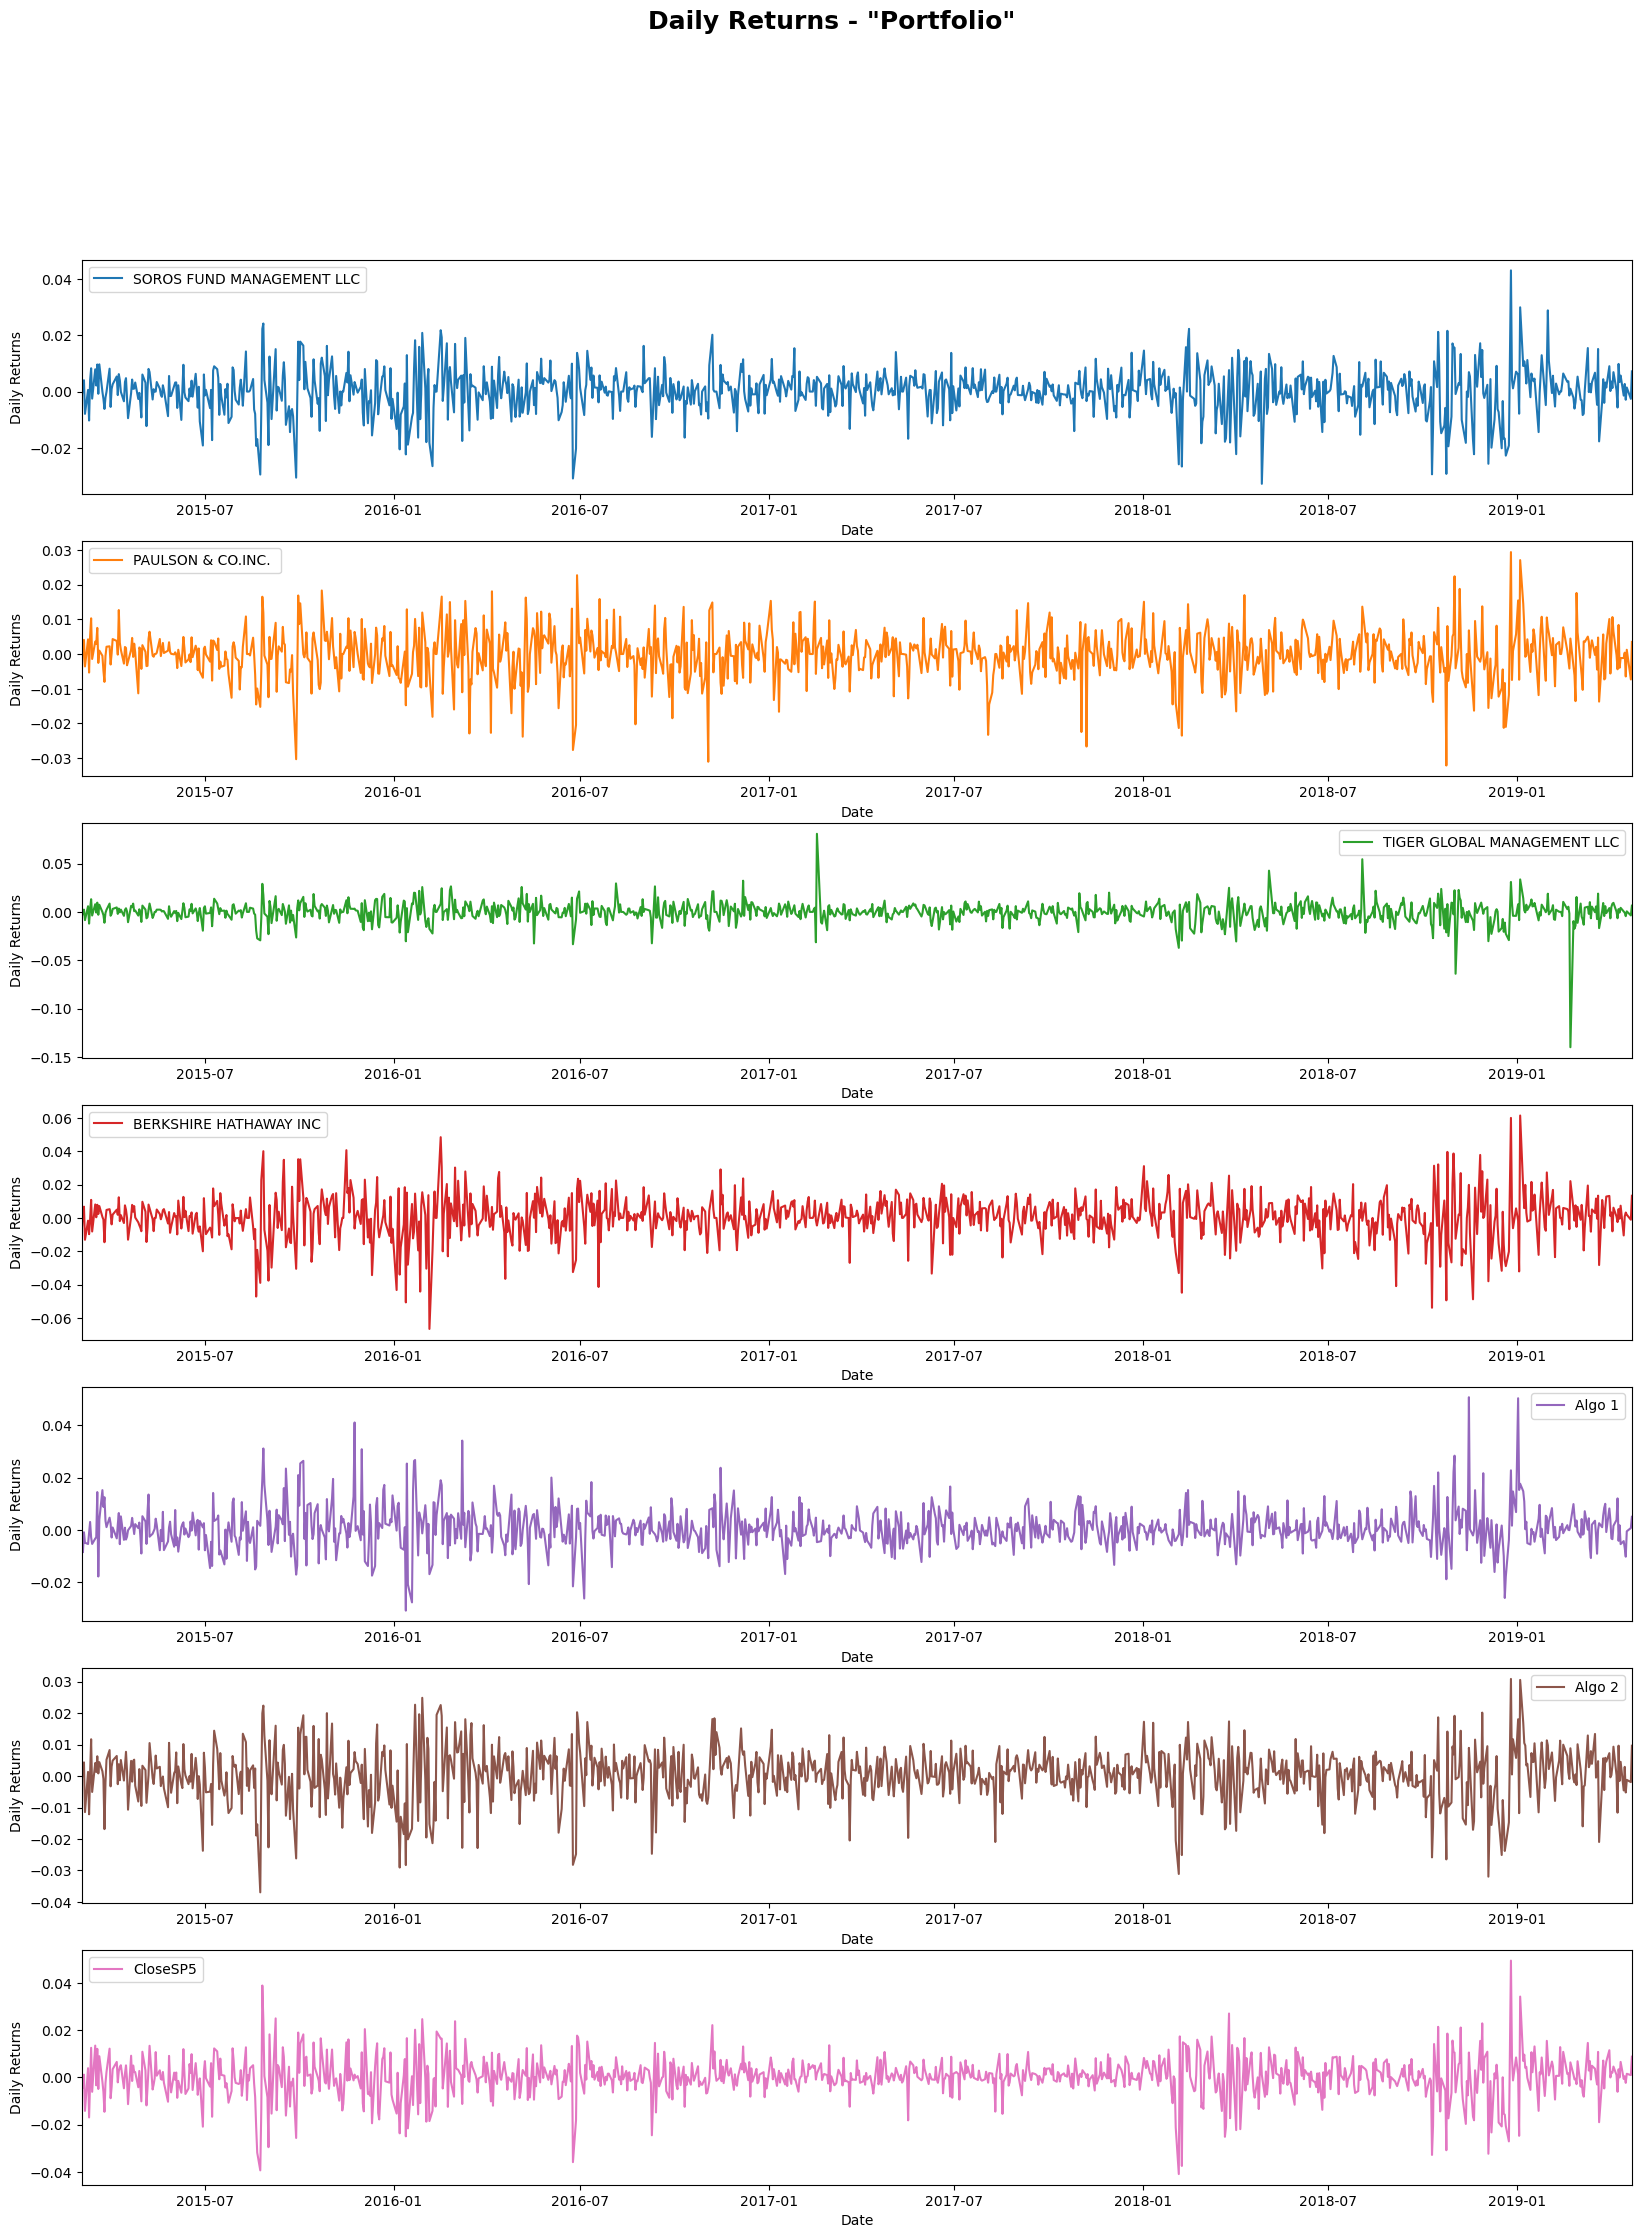

In [16]:
WASP_DF.plot(subplots=True, sharex=False, figsize=(20,25), xlabel="Date", ylabel="Daily Returns", xlim=['2015-03-03','2019-04-23'])
plt.suptitle('Daily Returns - \"Portfolio\"', fontsize = 18 , fontweight = 'bold')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Daily Returns - "Portfolio"'}, xlabel='Date', ylabel='Cumulative Returns'>

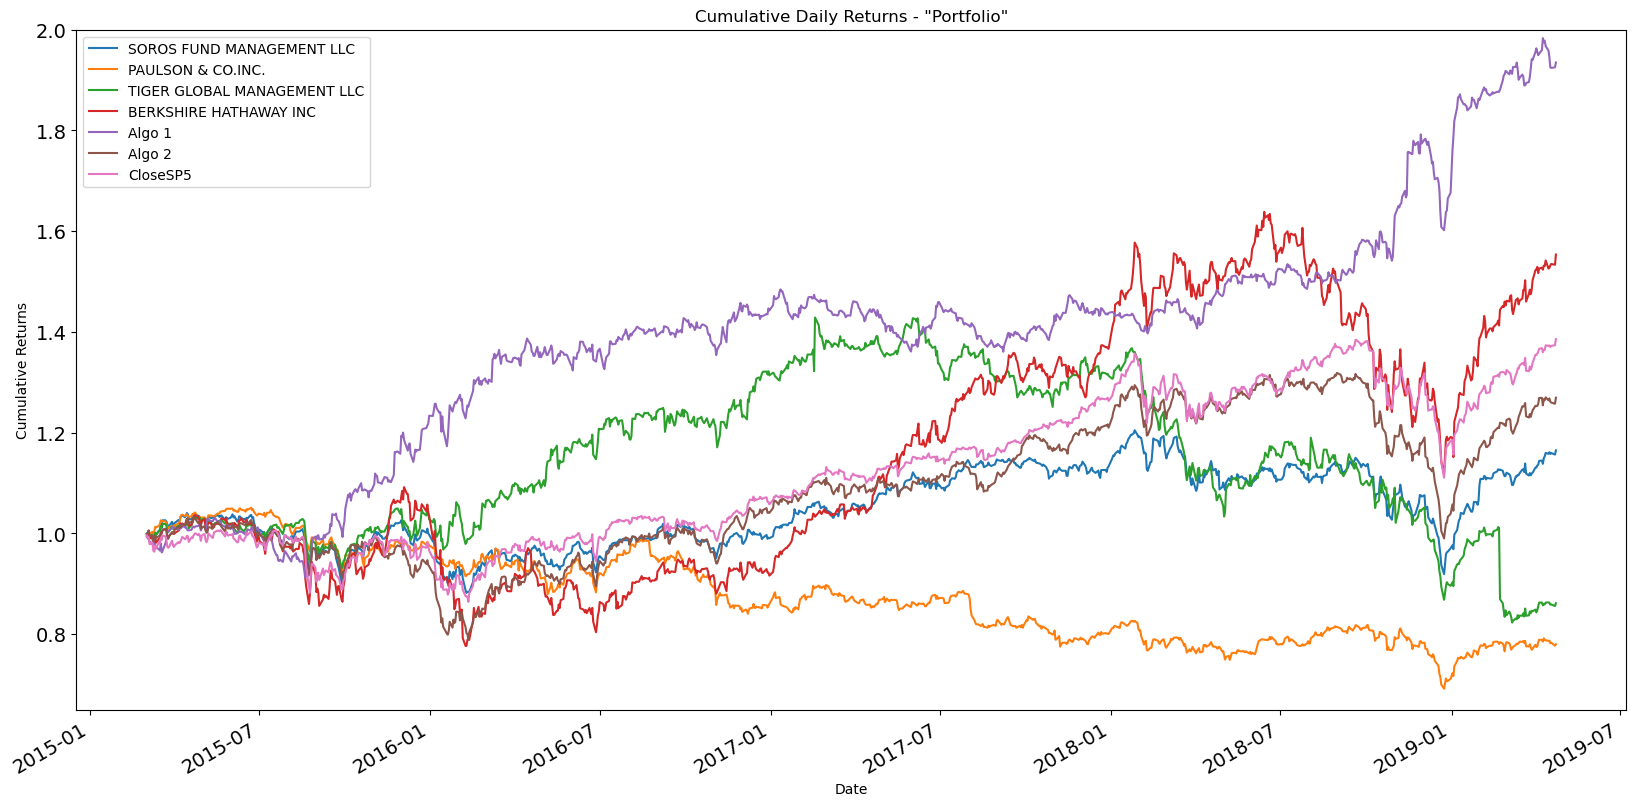

In [17]:
# Calculate cumulative returns of all portfolios (-) s&p500 index

cum_returns_df = (1+WASP_DF).cumprod()

#plot the Cumulative returns

cum_returns_df.plot(sharex=False,title="Cumulative Daily Returns - \"Portfolio\"", xlabel="Date", ylabel="Cumulative Returns", figsize=(20,10), fontsize=14, ylim=[0.65,2])




---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Portfolio Box Plot')

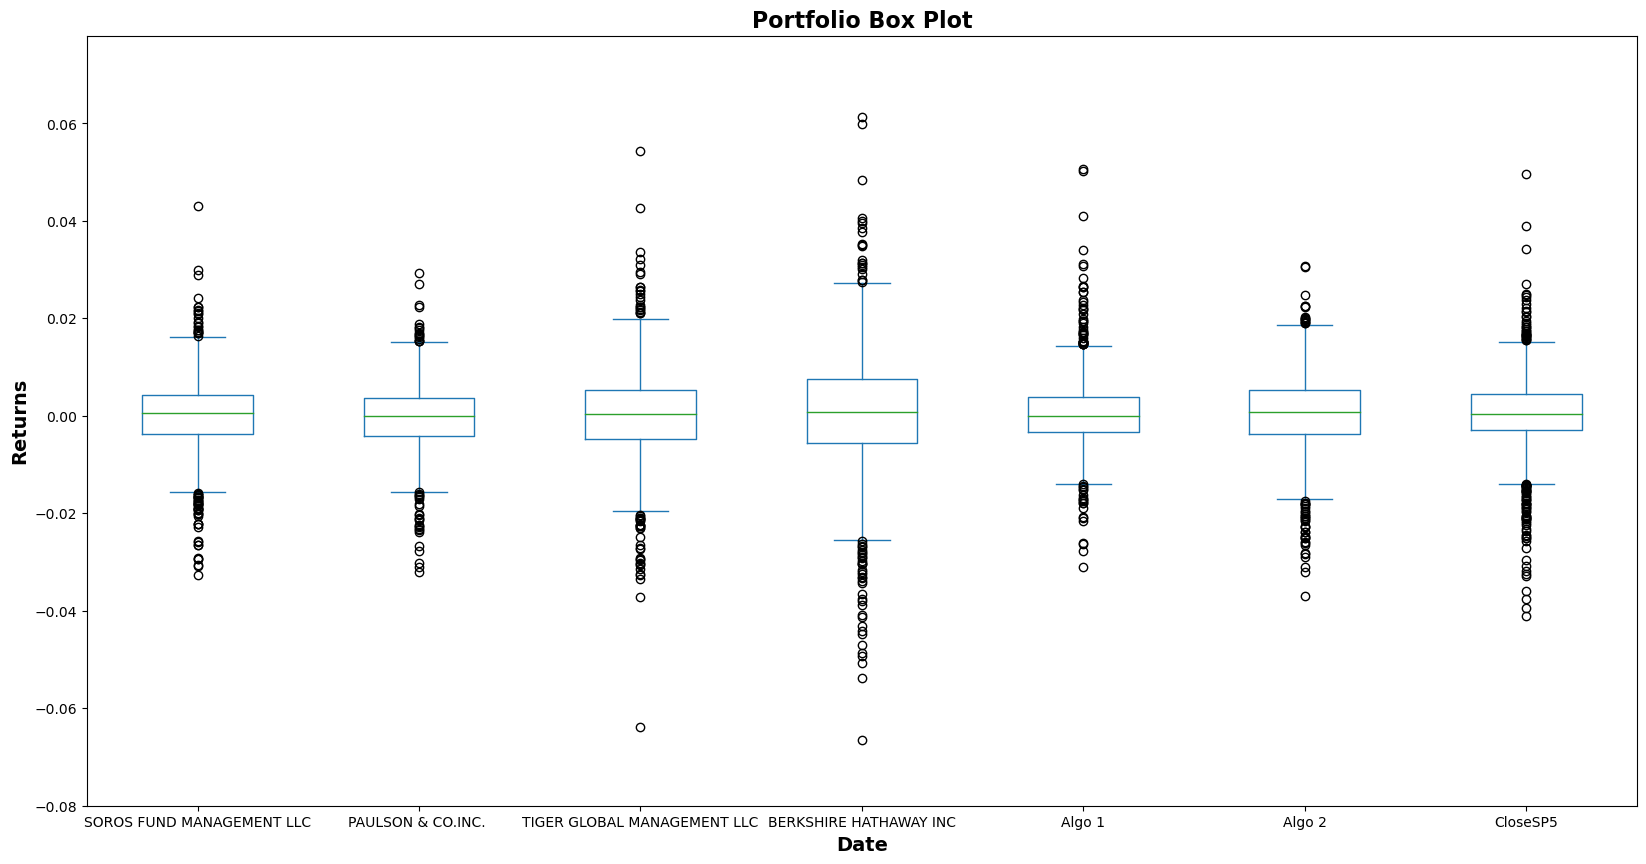

In [18]:
# Box plot to visually show risk

WASP_DF.plot.box(figsize=(20,10), fontsize=10, ylim=[-0.08, 0.078])

plt.xlabel("Date", fontweight = 'bold' , fontsize = 14)
plt.ylabel("Returns", fontweight = 'bold', fontsize = 14)
plt.title("Portfolio Box Plot", fontweight = 'bold', fontsize = 16)


### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
WASP_DF_STD = WASP_DF.std().sort_values(ascending=False)
WASP_DF_STD

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
CloseSP5                       0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
portfolio_vs_sp500_risk = [WASP_DF_STD > WASP_DF_STD["CloseSP5"]]
# Determine which portfolios are riskier than the S&P 500
print("--------- Risk assesment ---------")
print(f"{portfolio_vs_sp500_risk}")

--------- Risk assesment ---------
[BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
CloseSP5                       False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool]


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = WASP_DF_STD *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
CloseSP5                       0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

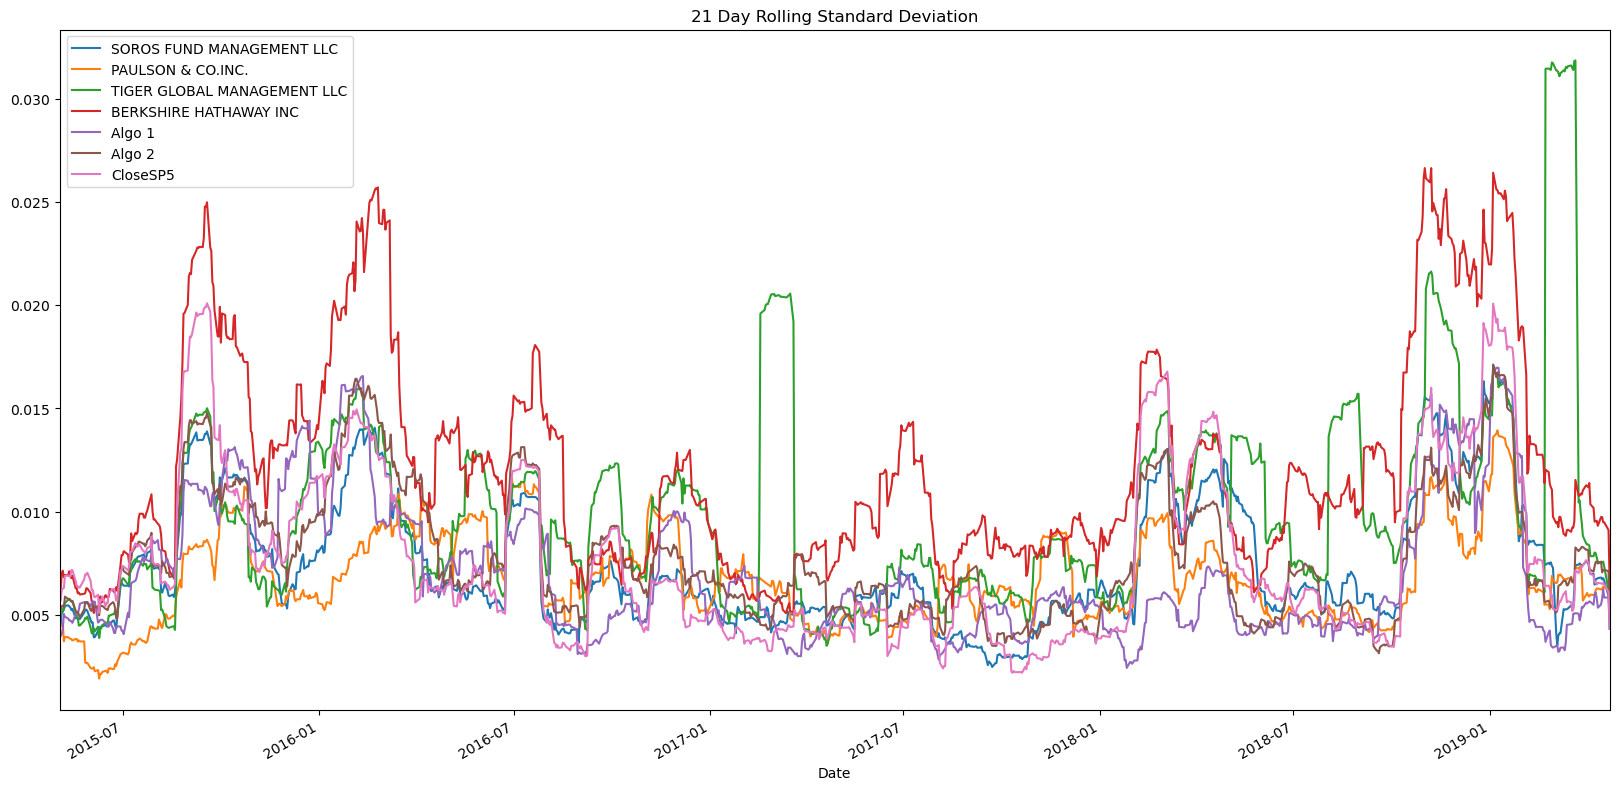

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
WASP_DF.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10),xlim=['2015-05-03','2019-04-23'])



### Calculate and plot the correlation

<AxesSubplot:>

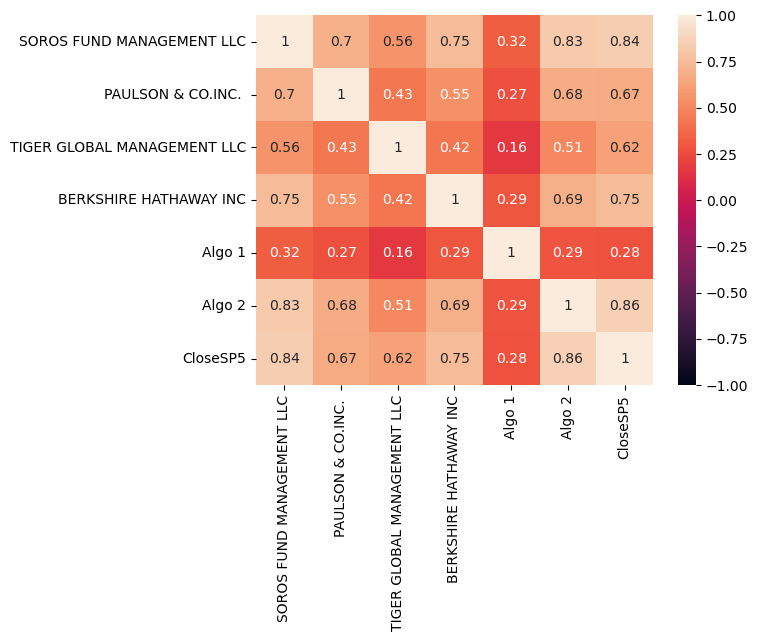

In [23]:
# Calculate the correlation
# Display de correlation matrix

correlation = WASP_DF.corr()
correlation
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)


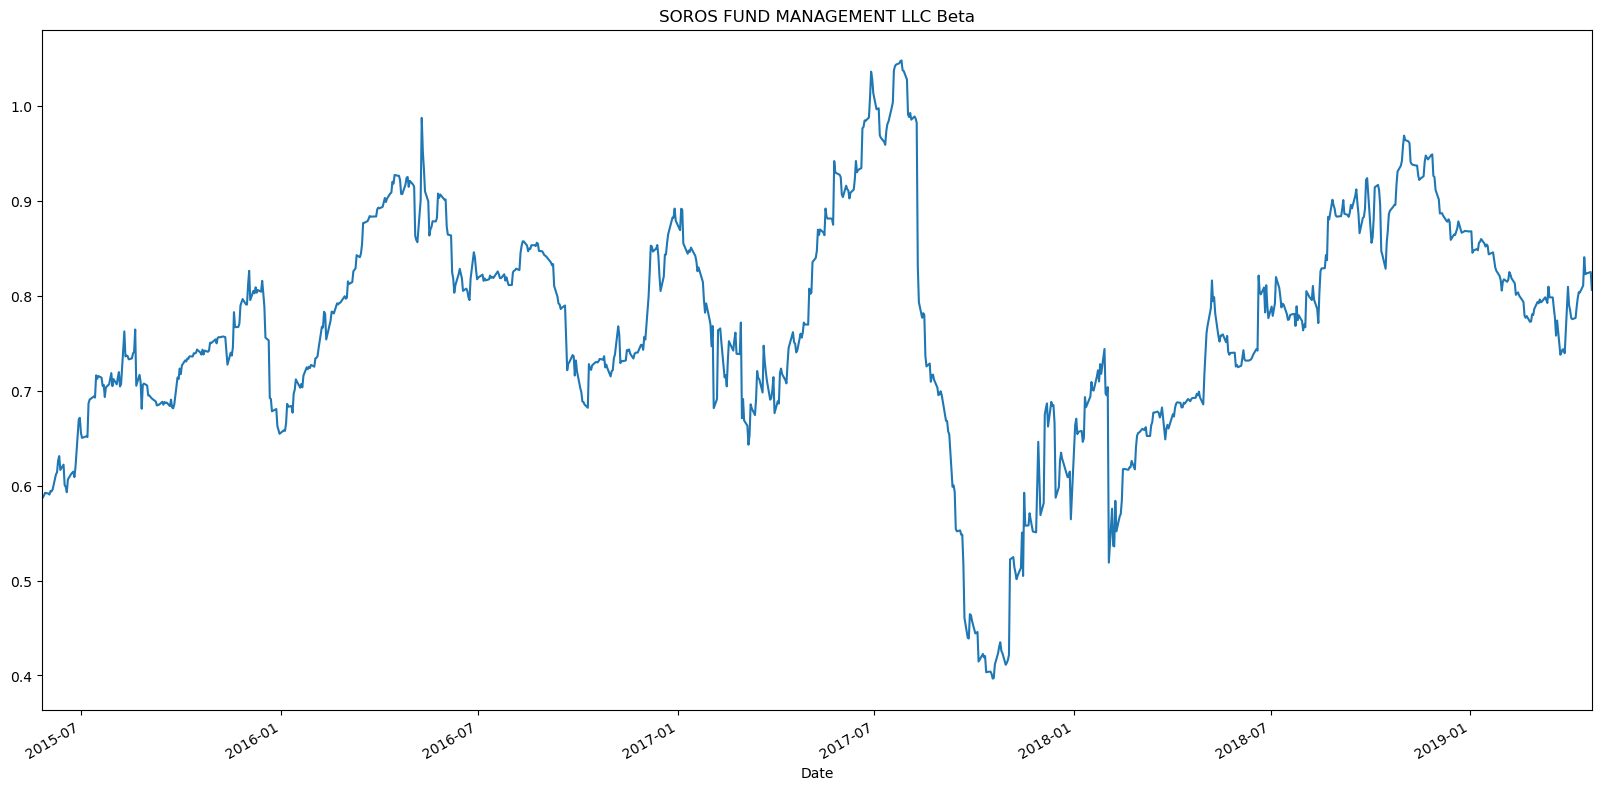

In [24]:
# Calculate covariance of a single portfolio
algo_1_covariance = WASP_DF['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(WASP_DF['CloseSP5'])
algo_1_covariance
# Calculate variance of all daily returns vs. S&P 500
variance = WASP_DF['CloseSP5'].rolling(window=60).var()
variance
# Calculate beta of all daily returns 
algo_1_beta = algo_1_covariance / variance
algo_1_beta_plot = algo_1_beta.plot(title="SOROS FUND MANAGEMENT LLC Beta", figsize=(20, 10), xlim=['2015-05-26','2019-04-23'])



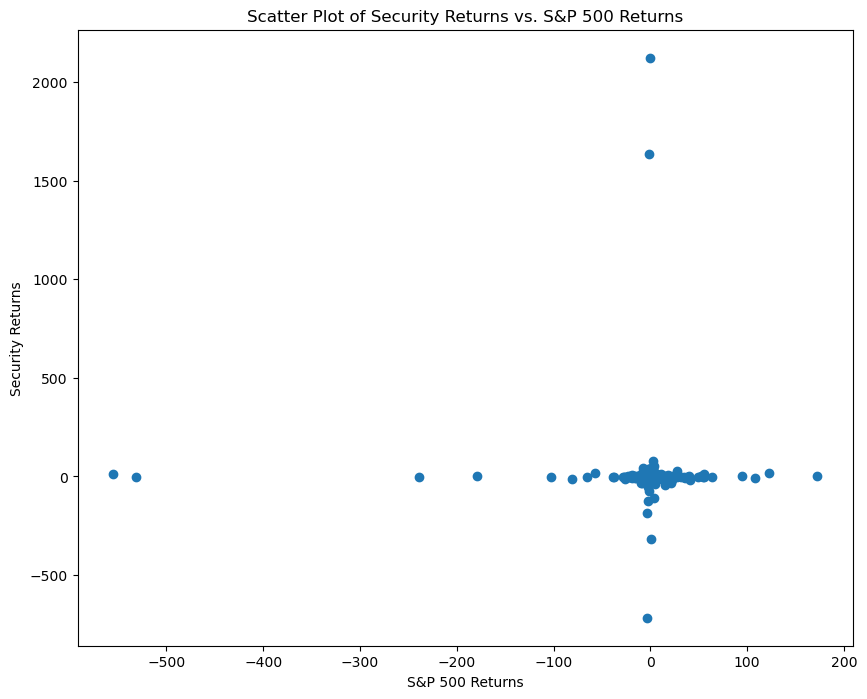

In [25]:
# Calculate daily returns of security and benchmark index
returns = WASP_DF[['SOROS FUND MANAGEMENT LLC', 'CloseSP5']].pct_change()

# Plot scatter plot of daily returns
plt.figure(figsize=(10, 8))
plt.scatter(x=returns['CloseSP5'], y=returns['SOROS FUND MANAGEMENT LLC'])
plt.xlabel('S&P 500 Returns')
plt.ylabel('Security Returns')
plt.title('Scatter Plot of Security Returns vs. S&P 500 Returns')
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

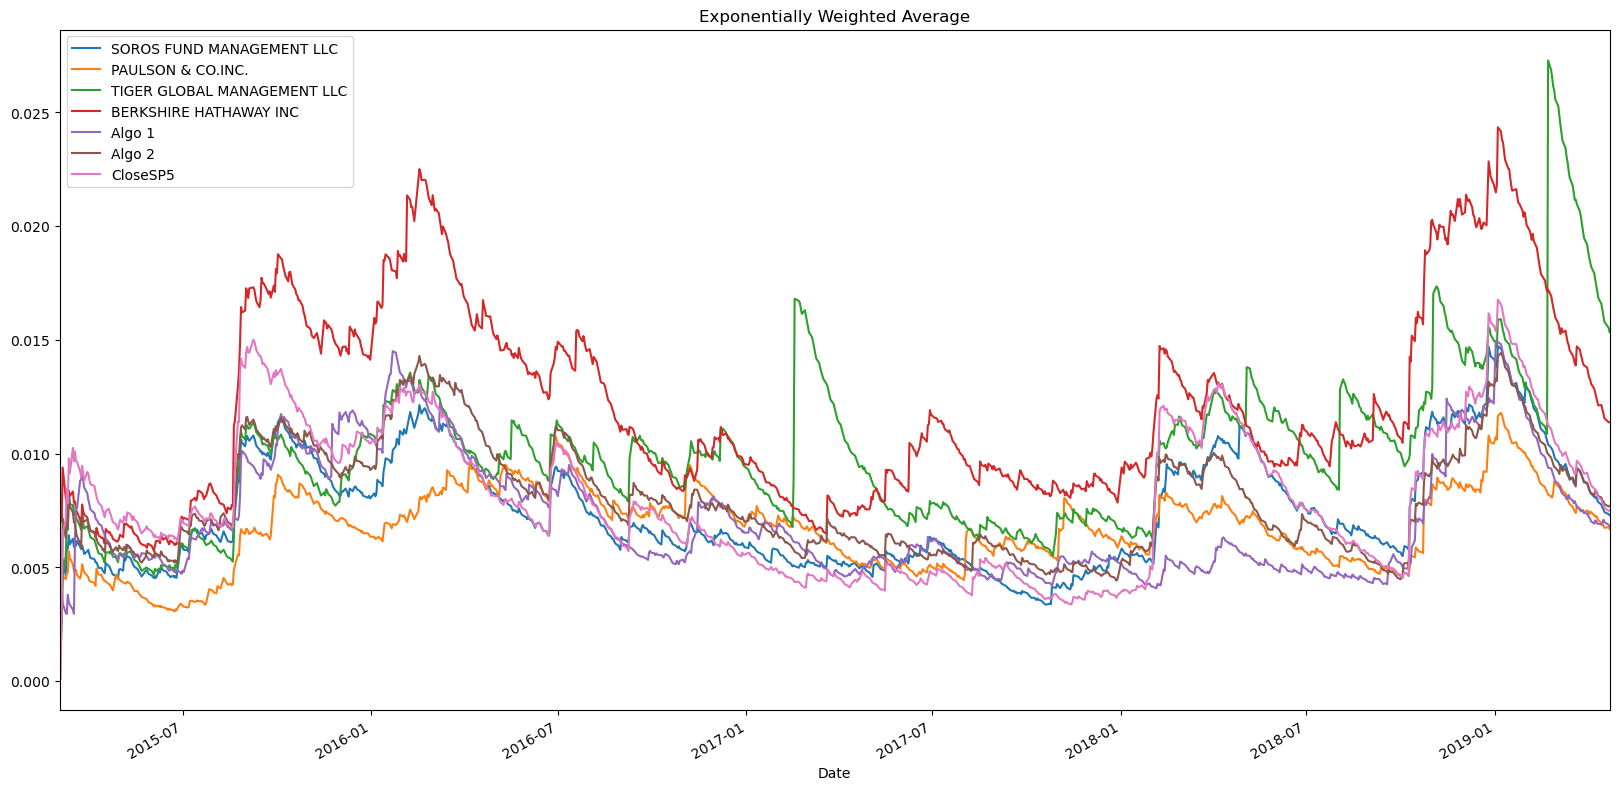

In [26]:
# Use `ewm` to calculate the rolling window

rolling_ewm = WASP_DF.ewm(halflife=21).std().plot(title="Exponentially Weighted Average", xlim=['2015-03-03','2019-04-23'], figsize=(20, 10))
rolling_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
annualized_sharpe_ratio = (WASP_DF.mean() * 252) / (WASP_DF.std() * np.sqrt(252))
annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
CloseSP5                       0.648267
dtype: float64

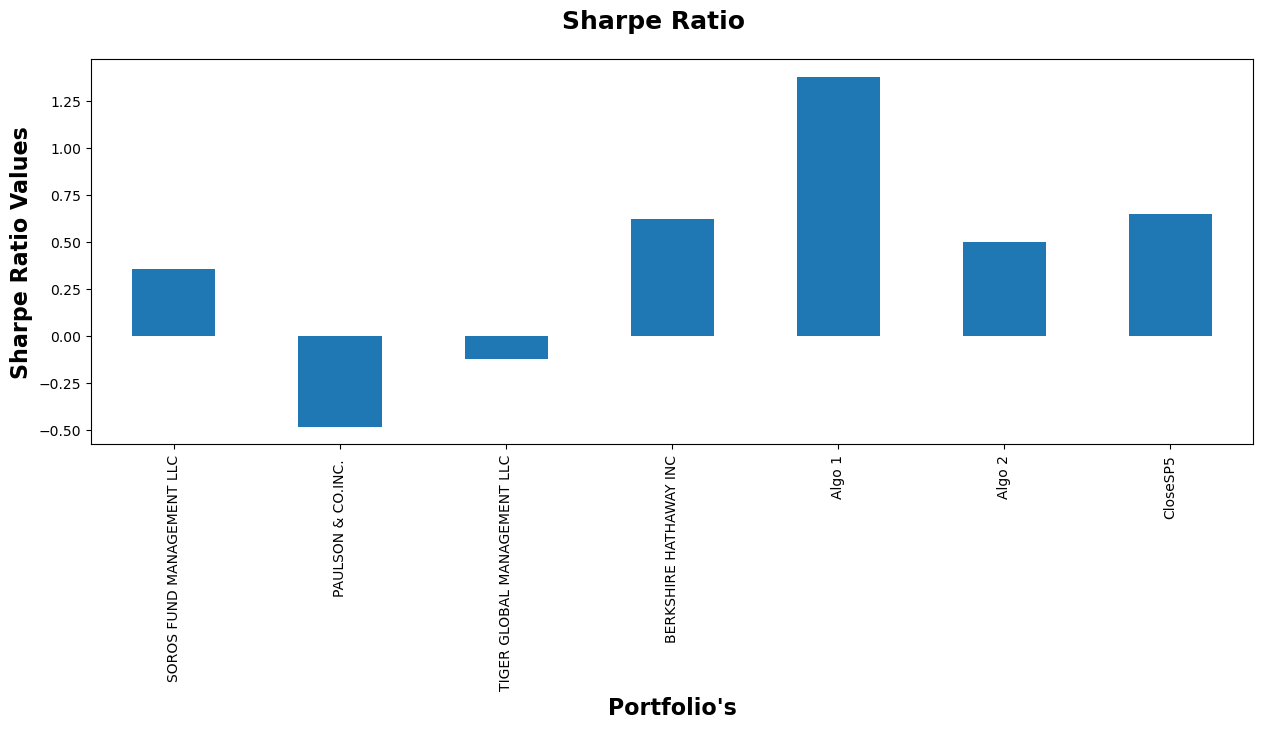

In [28]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot.bar(figsize = (15,5))

plt.xlabel("Portfolio's", fontsize=16, fontweight='bold');
plt.ylabel("Sharpe Ratio Values", fontsize=16, fontweight='bold');
plt.suptitle("Sharpe Ratio", fontsize=18, fontweight='bold');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The Algo 1 trading strategy performs better than the S&P 500 index and all of the whales, including Soros Fund Management LLC, Paulson & Co. Inc., Tiger Global Management LLC, and Berkshire Hathaway Inc. This is indicated by its higher Sharpe ratio compared to all of the whales and the market. On the other hand, the Algo 2 trading strategy performs worse than the market and the Berkshire Hathaway whale as it has a lower Sharpe ratio than both of them. However, it still performs better than the other three whales, with a higher Sharpe ratio.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Main function to read in data for any stock that is needed

def get_close_prices(symbol):
    # Set the start and end dates
    start_date = dt.datetime.now() - dt.timedelta(days=2000)
    end_date = dt.datetime.now()

    # Use yfinance to get the data for the symbol
    stock = yf.Ticker(symbol)

    # Get the historical market data for the desired date range
    history = stock.history(start=start_date, end=end_date)

    # Extract the closing price data from the historical data
    close_prices = history['Close']

    # Create a pandas DataFrame with the close prices and date index
    df = pd.DataFrame({symbol: close_prices.values}, index=close_prices.index.date)

    # Rename the index column label to "Date"
    df = df.rename_axis("Date")

    return df


In [30]:
# Reading data from 1st stock
# Get the close prices for Google
TSLA_DF = get_close_prices('TSLA')

# Print the DataFrame
print(TSLA_DF)

                  TSLA
Date                  
2017-10-23   22.468000
2017-10-24   22.489332
2017-10-25   21.722668
2017-10-26   21.744667
2017-10-27   21.391333
...                ...
2023-04-05  185.520004
2023-04-06  185.059998
2023-04-10  184.509995
2023-04-11  186.789993
2023-04-12  180.539993

[1376 rows x 1 columns]


In [31]:
# Reading data from 2nd stock
# Get the close prices for AMD
AMD_DF = get_close_prices('AMD')

# Print the DataFrame
AMD_DF.tail()


,AMD
Date,
2023-04-05,92.559998
2023-04-06,92.470001
2023-04-10,95.480003
2023-04-11,94.029999
2023-04-12,92.330002


In [32]:
# Reading data from 3rd stock
# Get the close prices for AMD
INTC_DF = get_close_prices('INTC')

# Print the DataFrame
INTC_DF.tail()


,INTC
Date,
2023-04-05,32.830002
2023-04-06,32.810001
2023-04-10,32.520000
2023-04-11,32.349998
2023-04-12,32.020000


In [33]:
# Reading data from 4th stock
# Get the close prices for AMD
BTCS_DF = get_close_prices('BTCS')

# Print the DataFrame
BTCS_DF.tail()

,BTCS
Date,
2023-04-05,1.296
2023-04-06,1.280
2023-04-10,1.145
2023-04-11,1.540
2023-04-12,1.410


In [34]:
# Reading data from 5th stock
# Get the close prices for AMD
CCOEY_DF = get_close_prices('CCOEY')

# Print the DataFrame
CCOEY_DF.tail()

,CCOEY
Date,
2023-04-06,17.540001
2023-04-10,17.700001
2023-04-11,17.510000
2023-04-12,17.502001
2023-04-13,17.910000


In [35]:
# Combine all stocks in a single DataFrame
CUSTOM_STOCK_LIST = pd.concat([TSLA_DF,AMD_DF,INTC_DF,CCOEY_DF,BTCS_DF], axis="columns", join="inner")
CUSTOM_STOCK_LIST

,TSLA,AMD,INTC,CCOEY,BTCS
Date,,,,,
2017-10-23,22.468000,14.100000,34.911606,3.052500,4.495593
2017-10-24,22.489332,14.250000,35.014214,3.027500,4.170254
2017-10-25,21.722668,12.330000,34.868855,3.142500,3.844915
2017-10-26,21.744667,12.010000,35.356236,3.142500,4.258983
2017-10-27,21.391333,11.840000,37.964130,3.115000,3.933644
...,...,...,...,...,...
2023-04-05,185.520004,92.559998,32.830002,17.870001,1.296000
2023-04-06,185.059998,92.470001,32.810001,17.540001,1.280000
2023-04-10,184.509995,95.480003,32.520000,17.700001,1.145000


In [36]:
# Reset Date index
RESET_INDEX_CUSTOM_STOCK_LIST = CUSTOM_STOCK_LIST.reset_index()
RESET_INDEX_CUSTOM_STOCK_LIST



,Date,TSLA,AMD,INTC,CCOEY,BTCS
0,2017-10-23,22.468000,14.100000,34.911606,3.052500,4.495593
1,2017-10-24,22.489332,14.250000,35.014214,3.027500,4.170254
2,2017-10-25,21.722668,12.330000,34.868855,3.142500,3.844915
3,2017-10-26,21.744667,12.010000,35.356236,3.142500,4.258983
4,2017-10-27,21.391333,11.840000,37.964130,3.115000,3.933644
...,...,...,...,...,...,...
1371,2023-04-05,185.520004,92.559998,32.830002,17.870001,1.296000
1372,2023-04-06,185.059998,92.470001,32.810001,17.540001,1.280000
1373,2023-04-10,184.509995,95.480003,32.520000,17.700001,1.145000
1374,2023-04-11,186.789993,94.029999,32.349998,17.510000,1.540000


In [37]:
# Reset Date index
RESET_INDEX_CUSTOM_STOCK_LIST = CUSTOM_STOCK_LIST.reset_index()
RESET_INDEX_CUSTOM_STOCK_LIST.set_index('Date', inplace=True)

RESET_INDEX_CUSTOM_STOCK_LIST



,TSLA,AMD,INTC,CCOEY,BTCS
Date,,,,,
2017-10-23,22.468000,14.100000,34.911606,3.052500,4.495593
2017-10-24,22.489332,14.250000,35.014214,3.027500,4.170254
2017-10-25,21.722668,12.330000,34.868855,3.142500,3.844915
2017-10-26,21.744667,12.010000,35.356236,3.142500,4.258983
2017-10-27,21.391333,11.840000,37.964130,3.115000,3.933644
...,...,...,...,...,...
2023-04-05,185.520004,92.559998,32.830002,17.870001,1.296000
2023-04-06,185.059998,92.470001,32.810001,17.540001,1.280000
2023-04-10,184.509995,95.480003,32.520000,17.700001,1.145000


In [38]:
# Reorganize portfolio data by having a column per symbol 
# @TODO I was able to accomplish this in the function above


In [39]:
# Calculate daily returns
daily_returns_custom = CUSTOM_STOCK_LIST.pct_change().dropna()
daily_returns_custom.head()
# Drop NAs

# Display sample data


,TSLA,AMD,INTC,CCOEY,BTCS
Date,,,,,
2017-10-24,0.000949,0.010638,0.002939,-0.008190,-0.072368
2017-10-25,-0.034090,-0.134737,-0.004151,0.037985,-0.078014
2017-10-26,0.001013,-0.025953,0.013978,0.000000,0.107692
2017-10-27,-0.016249,-0.014155,0.073761,-0.008751,-0.076389
2017-10-30,-0.002462,-0.080236,-0.000676,0.000000,0.007519


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
daily_returns_custom.std()

TSLA     0.040826
AMD      0.035554
INTC     0.023722
CCOEY    0.031571
BTCS     0.260253
dtype: float64

In [41]:
volatility = daily_returns_custom.std() * np.sqrt(252)
volatility


TSLA     0.648088
AMD      0.564405
INTC     0.376579
CCOEY    0.501181
BTCS     4.131394
dtype: float64

<AxesSubplot:title={'center':'Custom Portfolio Cumulative Returns'}, xlabel='Date'>

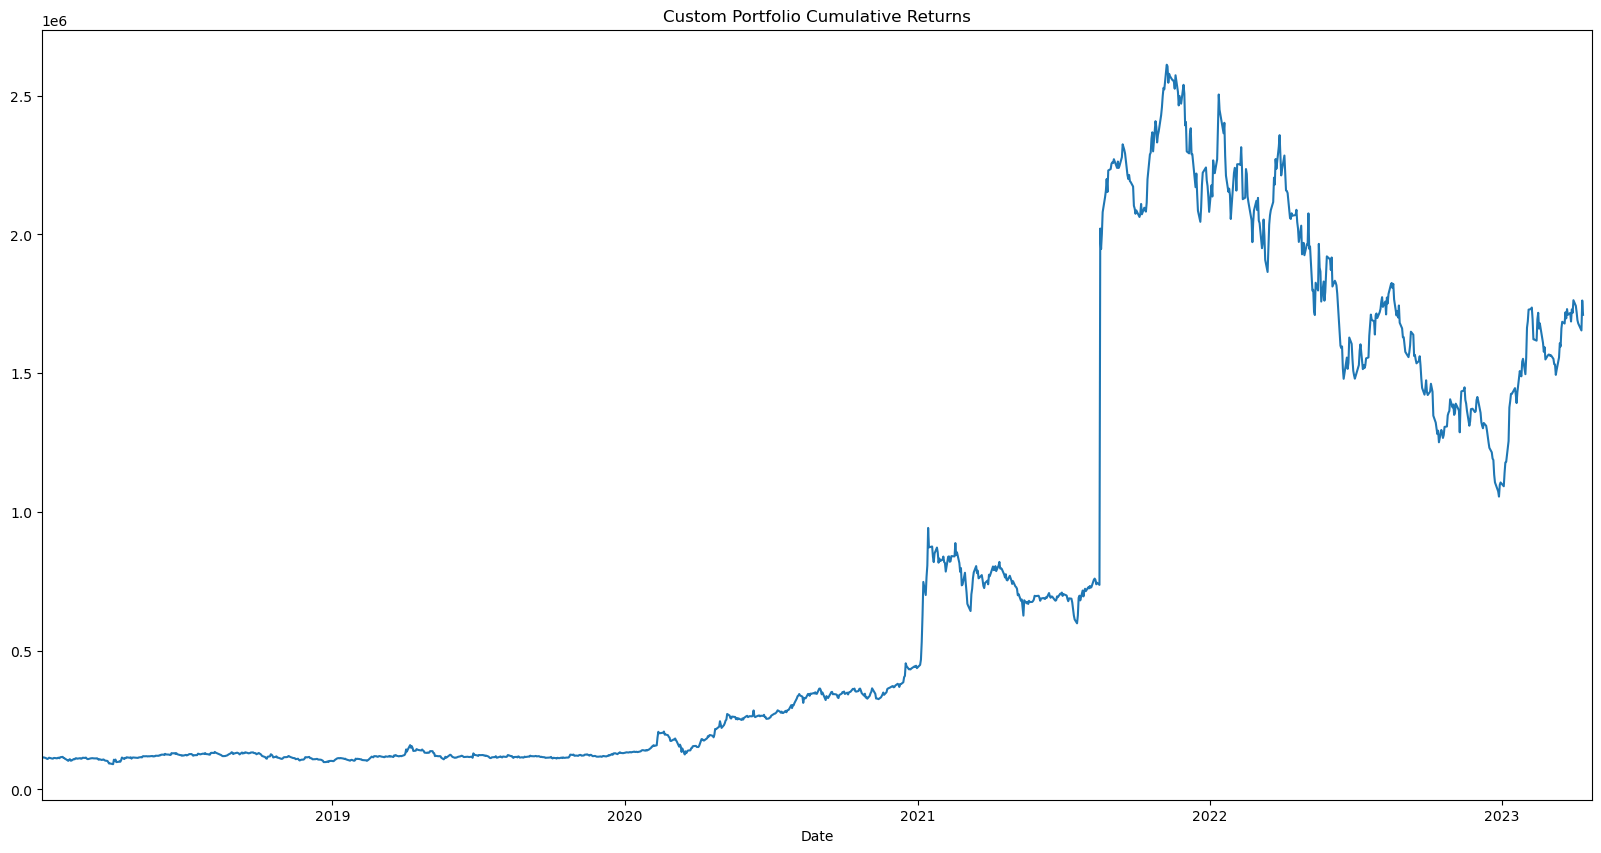

In [42]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
initial_investment = 100000
# Calculate portfolio return
custom_port_returns = daily_returns_custom.dot(weights)
custom_cumulative_returns = (1+custom_port_returns).cumprod()
custom_cumulative_returns = custom_cumulative_returns.rename("Custom")
# Display sample data
(initial_investment * custom_cumulative_returns).plot(xlim = ['2018-01-03','2023-04-23'], figsize=(20,10), title="Custom Portfolio Cumulative Returns")

<AxesSubplot:title={'center':'Custom Portfolio Cumulative Returns'}, xlabel='Date'>

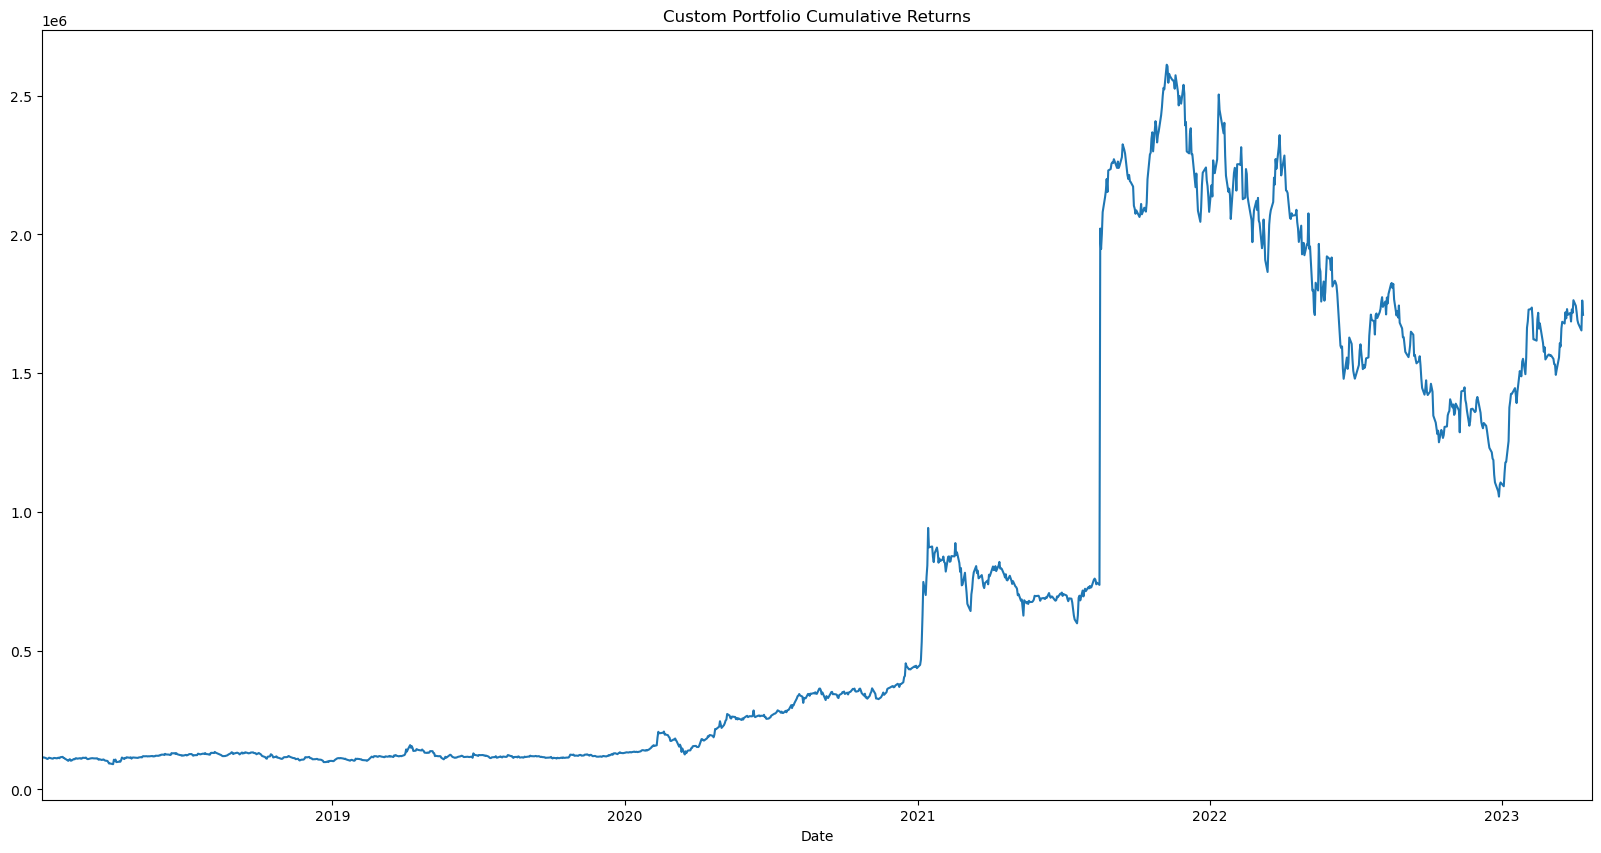

In [43]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
initial_investment = 100000
# Calculate portfolio return
custom_port_returns = daily_returns_custom.dot(weights)
custom_cumulative_returns = (1+custom_port_returns).cumprod()
custom_cumulative_returns = custom_cumulative_returns.rename("Custom")
# Display sample data
(initial_investment * custom_cumulative_returns).plot(xlim = ['2018-01-03','2023-04-23'], figsize=(20,10), title="Custom Portfolio Cumulative Returns")

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
custom_port_returns_df = pd.DataFrame(custom_port_returns, columns=['Custom Returns'])
custom_port_returns_df


,Custom Returns
Date,
2017-10-24,-0.013206
2017-10-25,-0.042601
2017-10-26,0.019346
2017-10-27,-0.008357
2017-10-30,-0.015171
...,...
2023-04-05,-0.016484
2023-04-06,-0.006975
2023-04-10,-0.015121


In [45]:
# Join your returns DataFrame to the original returns DataFrame

master_port = pd.concat([whale_df, algo_df, daily_return_sp500_df, custom_port_returns_df], axis='columns', join='inner')
master_port.head()

c:\ProgramData\Anaconda3\envs\dev\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,CloseSP5,Custom Returns
Date,,,,,,,,
2017-10-24,-0.004026,-0.001726,0.003547,0.002099,-0.004328,-0.000893,0.001618,-0.013206
2017-10-25,-0.002472,-0.001805,-0.000768,-0.008465,-0.002714,-0.007813,-0.004663,-0.042601
2017-10-26,-0.014021,-0.007442,-0.003836,-0.012692,-0.001044,-0.002034,0.001271,0.019346
2017-10-27,0.003142,0.000374,0.000091,0.017695,0.007027,0.004412,0.008073,-0.008357
2017-10-30,0.002596,-0.004175,-0.020872,-0.001231,0.012927,-0.008050,-0.003192,-0.015171


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
master_port = master_port.dropna()
master_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,CloseSP5,Custom Returns
Date,,,,,,,,
2017-10-24,-0.004026,-0.001726,0.003547,0.002099,-0.004328,-0.000893,0.001618,-0.013206
2017-10-25,-0.002472,-0.001805,-0.000768,-0.008465,-0.002714,-0.007813,-0.004663,-0.042601
2017-10-26,-0.014021,-0.007442,-0.003836,-0.012692,-0.001044,-0.002034,0.001271,0.019346
2017-10-27,0.003142,0.000374,0.000091,0.017695,0.007027,0.004412,0.008073,-0.008357
2017-10-30,0.002596,-0.004175,-0.020872,-0.001231,0.012927,-0.008050,-0.003192,-0.015171
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.040335
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.010732
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.009449


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
master_port_std = master_port.std()
master_annualized_std = master_port_std *np.sqrt(252)
master_annualized_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,CloseSP5,Custom Returns
Date,,,,,,,,
2017-10-24,-0.063909,-0.027404,0.056307,0.033326,-0.068702,-0.014168,0.025684,-0.209644
2017-10-25,-0.039243,-0.028657,-0.012197,-0.134385,-0.043087,-0.124023,-0.074024,-0.676278
2017-10-26,-0.222570,-0.118131,-0.060896,-0.201474,-0.016569,-0.032295,0.020176,0.307107
2017-10-27,0.049880,0.005933,0.001446,0.280893,0.111547,0.070046,0.128154,-0.132658
2017-10-30,0.041204,-0.066282,-0.331331,-0.019543,0.205203,-0.127782,-0.050679,-0.240834
...,...,...,...,...,...,...,...,...
2019-04-16,0.042852,0.006162,-0.013191,0.013282,-0.110244,0.046027,0.008086,0.640302
2019-04-17,-0.045984,-0.102663,-0.069998,0.051150,-0.163524,-0.082994,-0.036095,-0.170373
2019-04-18,0.022985,0.019396,0.009232,0.030417,-0.009333,-0.019513,0.025067,-0.150002


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

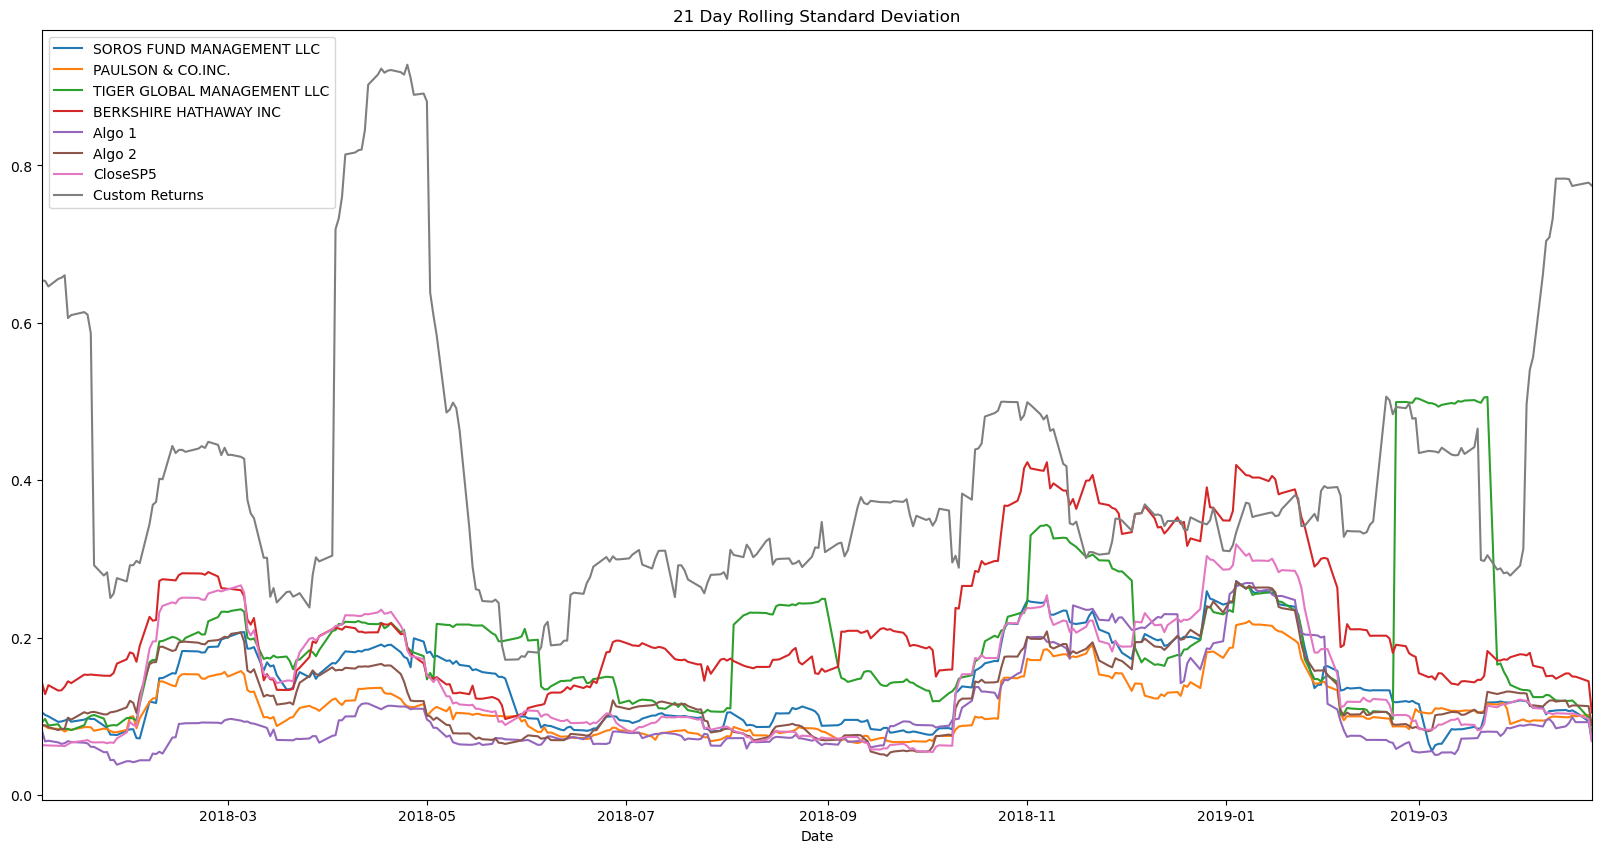

In [48]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
master_annualized_std.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10),xlim=['2018-01-03','2019-04-23'])



### Calculate and plot the correlation

<AxesSubplot:>

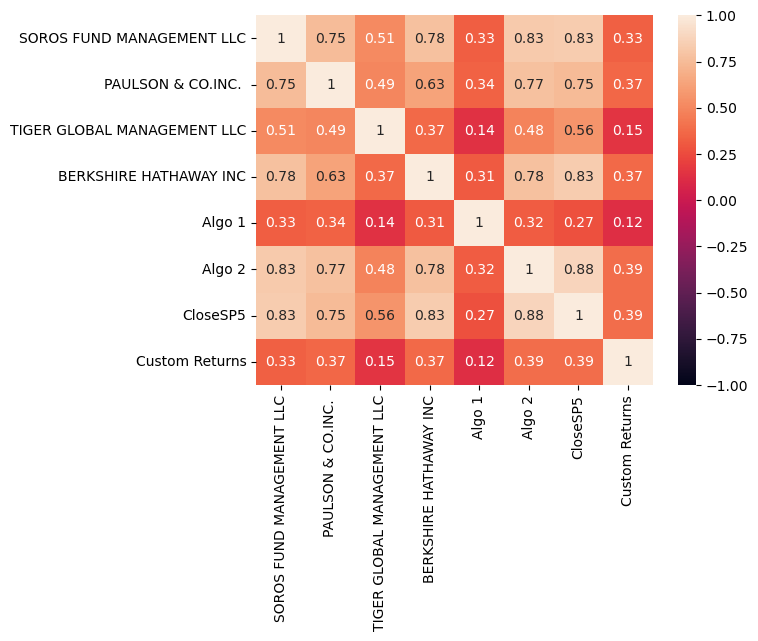

In [49]:
# Calculate and plot the correlation

correlation = master_port.corr()
correlation
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

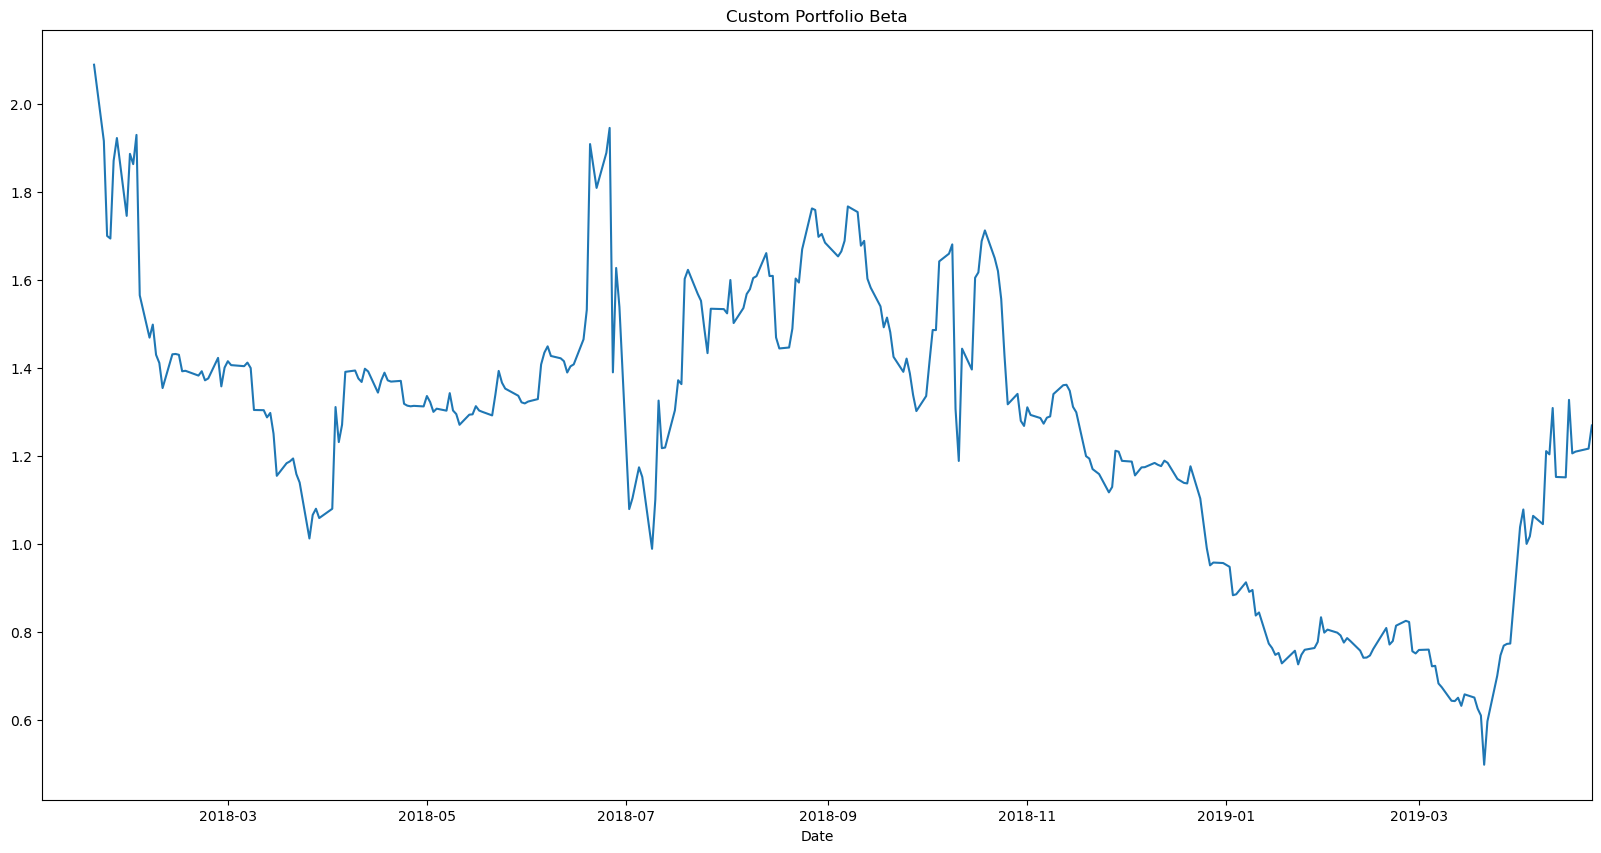

In [50]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
custom_port_covariance = master_port['Custom Returns'].rolling(window=60).cov(master_port['CloseSP5'])
custom_port_covariance
# Calculate variance of all daily returns vs. S&P 500
variance = master_port['CloseSP5'].rolling(window=60).var()
variance
# Calculate beta of all daily returns 
custom_port_beta = custom_port_covariance / variance
custom_port_beta_plot = custom_port_beta.plot(title="Custom Portfolio Beta", figsize=(20, 10), xlim=['2018-01-03','2019-04-23'])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualized Sharpe Ratios
custom_annualized_sharpe_ratio = (master_port.mean() * 252) / (master_port.std() * np.sqrt(252))
custom_annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.206167
PAULSON & CO.INC.             -0.168129
TIGER GLOBAL MANAGEMENT LLC   -1.141676
BERKSHIRE HATHAWAY INC         0.614166
Algo 1                         1.920007
Algo 2                         0.431605
CloseSP5                       0.668372
Custom Returns                 0.758231
dtype: float64

Text(0.5, 0.98, 'Sharpe Ratio')

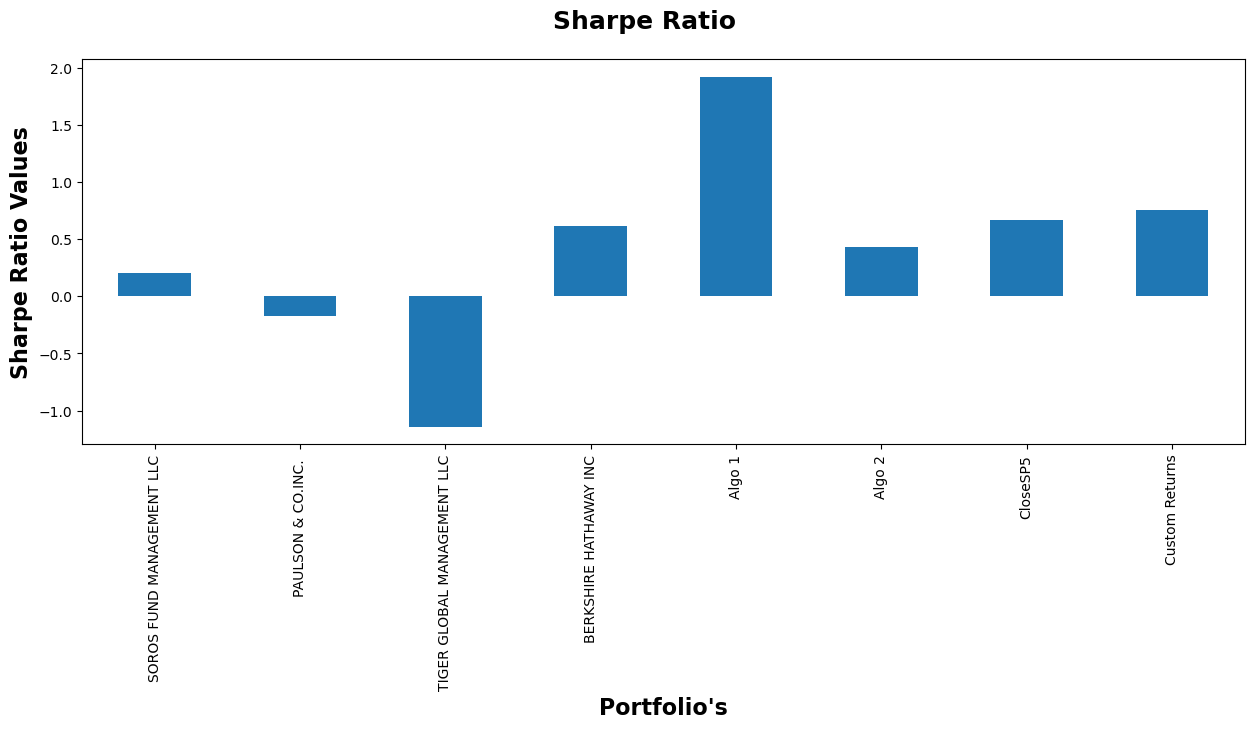

In [52]:
# Visualize the sharpe ratios as a bar plot
custom_annualized_sharpe_ratio.plot.bar(figsize = (15,5))

plt.xlabel("Portfolio's", fontsize=16, fontweight='bold')
plt.ylabel("Sharpe Ratio Values", fontsize=16, fontweight='bold')
plt.suptitle("Sharpe Ratio", fontsize=18, fontweight='bold')

### How does your portfolio do?

Write your answer here!

The custom portfolio trading strategy performs better than the S&P 500 index and all of the whales, including Soros Fund Management LLC, Paulson & Co. Inc., Tiger Global Management LLC, and Berkshire Hathaway Inc. Only the Algo 1 portfolio was able to out perform the custom portfolio. This is indicated by its higher Sharpe ratio compared to all of the whales and the market.


In [53]:
# Get a list of column names for each DataFrame
whale_cols = list(whale_df.columns)
algo_cols = list(algo_df.columns)
daily_return_sp500_cols = list(daily_return_sp500_df.columns)
custom_port_returns_cols = list(custom_port_returns_df.columns)

# Compare the lists of column names
if whale_cols == algo_cols == daily_return_sp500_cols == custom_port_returns_cols:
    print("Column names are exactly the same in each DataFrame.")
else:
    if whale_cols != algo_cols:
        print("Column names are different in whale_df and algo_df.")
    if whale_cols != daily_return_sp500_cols:
        print("Column names are different in whale_df and daily_return_sp500_df.")
    if whale_cols != custom_port_returns_cols:
        print("Column names are different in whale_df and custom_port_returns_df.")
    if algo_cols != daily_return_sp500_cols:
        print("Column names are different in algo_df and daily_return_sp500_df.")
    if algo_cols != custom_port_returns_cols:
        print("Column names are different in algo_df and custom_port_returns_df.")
    if daily_return_sp500_cols != custom_port_returns_cols:
        print("Column names are different in daily_return_sp500_df and custom_port_returns_df.")


Column names are different in whale_df and algo_df.
Column names are different in whale_df and daily_return_sp500_df.
Column names are different in whale_df and custom_port_returns_df.
Column names are different in algo_df and daily_return_sp500_df.
Column names are different in algo_df and custom_port_returns_df.
Column names are different in daily_return_sp500_df and custom_port_returns_df.


In [54]:
'''
A beta plot is a graphical representation of the relationship between the returns of a particular security and the returns of a benchmark index, such as the S&P 500. It is a scatter plot where each point represents a pair of returns for the security and the benchmark, usually over a period of time.

The slope of the line of best fit through the scatter plot represents the security's beta coefficient, which is a measure of the security's volatility relative to the benchmark index. A beta coefficient greater than 1 means that the security is more volatile than the benchmark, while a beta coefficient less than 1 means that the security is less volatile than the benchmark.

The beta plot can be used to determine the degree to which a security's returns are influenced by the market. If a security has a high beta coefficient, it is more sensitive to changes in the market and is likely to experience larger fluctuations in its returns. Conversely, if a security has a low beta coefficient, it is less sensitive to market fluctuations and may be a more stable investment.

In addition to analyzing the relationship between a security and a benchmark, the beta plot can also be used to compare the beta coefficients of different securities. This can help investors identify securities that are likely to perform well in different market conditions, or to construct a portfolio with a desired level of risk and return.
'''

"\nA beta plot is a graphical representation of the relationship between the returns of a particular security and the returns of a benchmark index, such as the S&P 500. It is a scatter plot where each point represents a pair of returns for the security and the benchmark, usually over a period of time.\n\nThe slope of the line of best fit through the scatter plot represents the security's beta coefficient, which is a measure of the security's volatility relative to the benchmark index. A beta coefficient greater than 1 means that the security is more volatile than the benchmark, while a beta coefficient less than 1 means that the security is less volatile than the benchmark.\n\nThe beta plot can be used to determine the degree to which a security's returns are influenced by the market. If a security has a high beta coefficient, it is more sensitive to changes in the market and is likely to experience larger fluctuations in its returns. Conversely, if a security has a low beta coefficien